# Q1


💡 **Question 1**

Given a string `s`, *find the first non-repeating character in it and return its index*. If it does not exist, return `-1`.

**Example 1:**

```
Input: s = "leetcode"
Output: 0

```

**Example 2:**

```
Input: s = "loveleetcode"
Output: 2

```

**Example 3:**

```
Input: s = "aabb"
Output: -1

```

# Ans.

**Solution Approach 1**

**Brute Force Approach:**

The brute force approach involves iterating over each character in the string and checking if it repeats anywhere else in the string. We can achieve this by using two nested loops. Here's the step-by-step algorithm:

1. Initialize a variable n as the length of the string s.
2. Iterate through each character at index i from 0 to n-1.
3. For each character at index i, check if it repeats anywhere else in the string.
4. If the character does not repeat, return the index i.
5. If all characters repeat, return -1.

In [1]:
def firstUniqChar_brute_force(s):
    n = len(s)
    for i in range(n):
        is_unique = True
        for j in range(n):
            if i != j and s[i] == s[j]:
                is_unique = False
                break
        if is_unique:
            return i
    return -1

**Test Case:**

In [2]:
# Test Cases for Brute Force Approach
print(firstUniqChar_brute_force("leetcode"))

0


In [3]:
print(firstUniqChar_brute_force("loveleetcode"))

2


In [4]:
print(firstUniqChar_brute_force("aabb")) 

-1


In [5]:
print(firstUniqChar_brute_force("aabbccdd"))

-1


In [6]:
print(firstUniqChar_brute_force("abcdef"))

0


**Discussion :**</br>

**The time complexity** of this brute force approach is O(n^2) because, in the worst case, for each character, we need to check all the remaining characters in the string. 

**The space complexity** is O(1) as we are not using any extra data structures.

**Solution Approach 2**

**Optimized Approach:**

The brute force approach is not efficient, especially for large strings, due to its quadratic time complexity. We can optimize the solution by using a dictionary (hash map) to store the frequency of each character in the string. Here's the step-by-step algorithm:

1. Initialize an empty dictionary freq_dict to store the frequency of characters.
2. Iterate through each character in the string s and update its frequency in the freq_dict.
3. Iterate through the characters in the string s again and check their frequency in the freq_dict.
4. Return the index of the first character with a frequency of 1.
5. If no character has a frequency of 1, return -1.


In [7]:
def firstUniqChar_optimized(s):
    freq_dict = {}
    for char in s:
        freq_dict[char] = freq_dict.get(char, 0) + 1
    for i, char in enumerate(s):
        if freq_dict[char] == 1:
            return i
    return -1

**Test Case:**

In [8]:
# Test Cases for Optimized Approach
print(firstUniqChar_optimized("leetcode"))

0


In [9]:
print(firstUniqChar_optimized("loveleetcode"))

2


In [10]:
print(firstUniqChar_optimized("aabb")) 

-1


In [11]:
print(firstUniqChar_optimized("aabbccdd"))

-1


In [12]:
print(firstUniqChar_optimized("abcdef"))

0


**Discussion :**</br>

**The time complexity** of this optimized approach is O(n), where n is the length of the string, because we iterate through the string twice but with separate loops. 

**The space complexity** is also O(n) because, in the worst case, all characters in the string can be unique, requiring storage in the dictionary.

# Q2

💡 **Question 2**

Given a **circular integer array** `nums` of length `n`, return *the maximum possible sum of a non-empty **subarray** of* `nums`.

A **circular array** means the end of the array connects to the beginning of the array. Formally, the next element of `nums[i]` is `nums[(i + 1) % n]` and the previous element of `nums[i]` is `nums[(i - 1 + n) % n]`.

A **subarray** may only include each element of the fixed buffer `nums` at most once. Formally, for a subarray `nums[i], nums[i + 1], ..., nums[j]`, there does not exist `i <= k1`, `k2 <= j` with `k1 % n == k2 % n`.

**Example 1:**

```
Input: nums = [1,-2,3,-2]
Output: 3
Explanation: Subarray [3] has maximum sum 3.

```

**Example 2:**

```
Input: nums = [5,-3,5]
Output: 10
Explanation: Subarray [5,5] has maximum sum 5 + 5 = 10.

```

**Example 3:**

```
Input: nums = [-3,-2,-3]
Output: -2
Explanation: Subarray [-2] has maximum sum -2.

```

# Ans.

**Solution Approach 1**

**Brute Force Approach:**

The brute force approach involves considering all possible subarrays and calculating their sums. We can achieve this by using two nested loops to iterate through each starting and ending position of the subarrays. Here's the step-by-step algorithm:

1. Initialize a variable max_sum to store the maximum sum encountered.
2. Iterate through each starting position i from 0 to n-1, where n is the length of the array.
3. Iterate through each ending position j from i to n-1.
4. Calculate the sum of the subarray from index i to index j using modular arithmetic to handle circularity.
5. Update max_sum if the current sum is greater than max_sum.
6. Return max_sum after both loops.

In [13]:
def maxSubarraySumCircular_brute_force(nums):
    n = len(nums)
    max_sum = float('-inf')

    for i in range(n):
        current_sum = 0
        for j in range(i, n + i):
            current_sum += nums[j % n]
            max_sum = max(max_sum, current_sum)

    return max_sum

**Test Case:**

In [14]:
# Test Cases for Brute Force Approach
print(maxSubarraySumCircular_brute_force([1, -2, 3, -2]))

3


In [15]:
print(maxSubarraySumCircular_brute_force([5, -3, 5]))

10


In [16]:
print(maxSubarraySumCircular_brute_force([-3, -2, -3]))

-2


In [17]:
print(maxSubarraySumCircular_brute_force([-1, -2, -3, -4, -5]))

-1


In [18]:
print(maxSubarraySumCircular_brute_force([1, 2, 3, 4, 5]))

15


**Discussion :**</br>

**The time complexity** of this brute force approach is O(n^2) because, in the worst case, we need to consider all possible subarrays. 

**The space complexity** is O(1) as we are not using any extra data structures.

**Solution Approach 2**

**Optimized Approach:**

The optimized approach utilizes Kadane's algorithm, which is commonly used to find the maximum subarray sum in a linear array. We'll modify it to handle circular arrays. Here's the step-by-step algorithm:

1. Calculate the maximum subarray sum using Kadane's algorithm. Let's call it max_sum_linear.
2. Calculate the total sum of the array. Let's call it total_sum.
3. Negate each element in the array.
4. Calculate the minimum subarray sum using Kadane's algorithm on the negated array. Let's call it min_sum_linear.
5. If min_sum_linear is equal to the total sum, return max_sum_linear.
6. Otherwise, calculate the maximum between max_sum_linear and total_sum + min_sum_linear.
7. Return the maximum value obtained in step 6.

In [19]:
def maxSubarraySumCircular_optimized(nums):
    def kadane(arr):
        max_sum = float('-inf')
        current_sum = 0

        for num in arr:
            current_sum = max(num, current_sum + num)
            max_sum = max(max_sum, current_sum)

        return max_sum

    max_sum_linear = kadane(nums)
    total_sum = sum(nums)

    negated_nums = [-num for num in nums]
    min_sum_linear = kadane(negated_nums)

    if min_sum_linear == total_sum:
        return max_sum_linear

    return max(max_sum_linear, total_sum + min_sum_linear)

**Test Case:**

In [20]:
# Test Cases for Optimized Approach
print(maxSubarraySumCircular_optimized([1, -2, 3, -2]))

3


In [21]:
print(maxSubarraySumCircular_optimized([5, -3, 5])) 

10


In [22]:
print(maxSubarraySumCircular_optimized([1, 2, 3, 4, 5]))

15


**Discussion :**</br>

**The time complexity** of this optimized approach is O(n) because we iterate through the array twice using Kadane's algorithm. 

**The space complexity** is O(1) as we use a few additional variables to store the sums.

# Q3


💡 **Question 3**

The school cafeteria offers circular and square sandwiches at lunch break, referred to by numbers `0` and `1` respectively. All students stand in a queue. Each student either prefers square or circular sandwiches.

The number of sandwiches in the cafeteria is equal to the number of students. The sandwiches are placed in a **stack**. At each step:

- If the student at the front of the queue **prefers** the sandwich on the top of the stack, they will **take it** and leave the queue.
- Otherwise, they will **leave it** and go to the queue's end.

This continues until none of the queue students want to take the top sandwich and are thus unable to eat.

You are given two integer arrays `students` and `sandwiches` where `sandwiches[i]` is the type of the `ith` sandwich in the stack (`i = 0` is the top of the stack) and `students[j]` is the preference of the `jth` student in the initial queue (`j = 0` is the front of the queue). Return *the number of students that are unable to eat.*

**Example 1:**

```
Input: students = [1,1,0,0], sandwiches = [0,1,0,1]
Output: 0
Explanation:
- Front student leaves the top sandwich and returns to the end of the line making students = [1,0,0,1].
- Front student leaves the top sandwich and returns to the end of the line making students = [0,0,1,1].
- Front student takes the top sandwich and leaves the line making students = [0,1,1] and sandwiches = [1,0,1].
- Front student leaves the top sandwich and returns to the end of the line making students = [1,1,0].
- Front student takes the top sandwich and leaves the line making students = [1,0] and sandwiches = [0,1].
- Front student leaves the top sandwich and returns to the end of the line making students = [0,1].
- Front student takes the top sandwich and leaves the line making students = [1] and sandwiches = [1].
- Front student takes the top sandwich and leaves the line making students = [] and sandwiches = [].
Hence all students are able to eat.

```

**Example 2:**

```
Input: students = [1,1,1,0,0,1], sandwiches = [1,0,0,0,1,1]
Output: 3

```

# Ans.

**Solution Approach 1**

**Brute Force Approach:**

The brute force approach involves simulating the sandwich distribution process according to the given rules. We can iterate through the queue of students and the stack of sandwiches, performing the required actions until either all students have taken sandwiches or no changes occur in a complete iteration. Here's the step-by-step algorithm:

1. Initialize a variable count_unable_to_eat to keep track of the number of students unable to eat.
2. Initialize a variable changed to track if any sandwich distribution occurred in a complete iteration.
3. Iterate through the queue of students until all students have taken sandwiches or no changes occur in a complete iteration.
    - Within each iteration, iterate through the stack of sandwiches.
    - If the current student prefers the top sandwich, they take it and leave the queue.
    - Otherwise, the student goes to the end of the queue.
    - Update the changed flag if any sandwich distribution occurs.
    - If no changes occur in a complete iteration, break from the loop.
4. Return the value of count_unable_to_eat.

In [23]:
def countStudents_brute_force(students, sandwiches):
    count_unable_to_eat = 0
    changed = True

    while students and changed:
        changed = False
        n = len(students)

        for i in range(n):
            if students[i] == sandwiches[0]:
                sandwiches.pop(0)
                students.pop(i)
                changed = True
                break

        if not changed:
            count_unable_to_eat = len(students)

    return count_unable_to_eat




**Test Case:**

In [24]:
# Test Cases for Brute Force Approach
print(countStudents_brute_force([1, 1, 0, 0], [0, 1, 0, 1]))

0


In [25]:
print(countStudents_brute_force([1, 1, 1, 0, 0, 1], [1, 0, 0, 0, 1, 1]))

3


**Discussion :**</br>

**The time complexity** of this brute force approach can be up to O(n^2) in the worst case, where n is the number of students. 

**The space complexity** is O(1) as we are not using any additional data structures.

**Solution Approach 2**

**Optimized Approach:**

The optimized approach leverages the fact that the distribution of sandwiches can only be interrupted if the number of consecutive students at the front of the queue, who cannot eat, is equal to the number of consecutive sandwiches that do not match the preferences of the students. We can count these occurrences and calculate the remaining number of students who are unable to eat directly. Here's the step-by-step algorithm:

1. Count the number of consecutive students at the front of the queue whose preferences match the top sandwiches. Let's call it count_matches.
2. Calculate the number of consecutive sandwiches that do not match the preferences of the students, starting from the index count_matches. Let's call it count_mismatches.
3. Return the value of count_mismatches.

In [26]:
def countStudents_optimized(students, sandwiches):
    count_unable_to_eat = 0
    n = len(students)
    student_pref_count = [0, 0]

    for pref in students:
        student_pref_count[pref] += 1

    for sandwich in sandwiches:
        if student_pref_count[sandwich] > 0:
            student_pref_count[sandwich] -= 1
        else:
            break
    else:
        return 0

    return sum(student_pref_count)



**Test Case:**

In [27]:
print(countStudents_optimized([1, 1, 0, 0], [0, 1, 0, 1]))

0


In [28]:
print(countStudents_optimized([1, 1, 1, 0, 0, 1], [1, 0, 0, 0, 1, 1]))

3


In [29]:
print(countStudents_optimized([1, 1, 1], [0, 0, 0]))

3


**Discussion :**</br>

**The time complexity** of this optimized approach is O(n), where n is the number of students. 

**The space complexity** is O(1) as we are not using any extra data structures.

# Q4


💡 **Question 4**

You have a `RecentCounter` class which counts the number of recent requests within a certain time frame.

Implement the `RecentCounter` class:

- `RecentCounter()` Initializes the counter with zero recent requests.
- `int ping(int t)` Adds a new request at time `t`, where `t` represents some time in milliseconds, and returns the number of requests that has happened in the past `3000` milliseconds (including the new request). Specifically, return the number of requests that have happened in the inclusive range `[t - 3000, t]`.

It is **guaranteed** that every call to `ping` uses a strictly larger value of `t` than the previous call.

**Example 1:**

```
Input
["RecentCounter", "ping", "ping", "ping", "ping"]
[[], [1], [100], [3001], [3002]]
Output
[null, 1, 2, 3, 3]

Explanation
RecentCounter recentCounter = new RecentCounter();
recentCounter.ping(1);     // requests = [1], range is [-2999,1], return 1
recentCounter.ping(100);   // requests = [1,100], range is [-2900,100], return 2
recentCounter.ping(3001);  // requests = [1,100,3001], range is [1,3001], return 3
recentCounter.ping(3002);  // requests = [1,100,3001,3002], range is [2,3002], return 3

```

# Ans.

**Solution Approach 1**

**Brute Force Approach** 

In [30]:
class RecentCounter:
    def __init__(self):
        self.requests = []

    def ping(self, t):
        self.requests.append(t)
        start_time = t - 3000
        count = 0
        for request in self.requests:
            if request >= start_time:
                count += 1
        return count


**Test Case:**

In [31]:
# Test cases for brute force approach
rc = RecentCounter()
print(rc.ping(1))

1


In [32]:
print(rc.ping(100))

2


In [33]:
print(rc.ping(3001))

3


In [34]:
print(rc.ping(3002))

3


**Discussion :**</br>

**The time complexity** of the ping function in the brute force approach is O(n), where n is the number of requests made so far. In the worst case, we iterate over all the requests to count the number of requests within the time frame.

**The space complexity** of the RecentCounter class is O(n), where n is the number of requests made so far. We store all the requests in the self.requests list.

**Solution Approach 2**

 **Optimized Approach**

In [35]:
from collections import deque

class RecentCounter:
    def __init__(self):
        self.requests = deque()

    def ping(self, t):
        self.requests.append(t)
        while self.requests[0] < t - 3000:
            self.requests.popleft()
        return len(self.requests)


**Test Case:**

In [36]:
# Test cases for optimized approach
rc = RecentCounter()
print(rc.ping(1))

1


In [37]:
print(rc.ping(100))

2


In [38]:
print(rc.ping(3001))

3


In [39]:
print(rc.ping(3002))  

3


**Discussion :**</br>

**The time complexity** of the ping function in the optimized approach is O(1). We only perform constant-time operations such as deque append, popleft, and length calculation.

**The space complexity** of the RecentCounter class is O(k), where k is the maximum number of requests within the time frame at any given time. In this case, k will be at most 3000, so the space complexity can be considered constant.

# Q5


💡 **Question 5**

There are `n` friends that are playing a game. The friends are sitting in a circle and are numbered from `1` to `n` in **clockwise order**. More formally, moving clockwise from the `ith` friend brings you to the `(i+1)th` friend for `1 <= i < n`, and moving clockwise from the `nth` friend brings you to the `1st` friend.

The rules of the game are as follows:

1. **Start** at the `1st` friend.
2. Count the next `k` friends in the clockwise direction **including** the friend you started at. The counting wraps around the circle and may count some friends more than once.
3. The last friend you counted leaves the circle and loses the game.
4. If there is still more than one friend in the circle, go back to step `2` **starting** from the friend **immediately clockwise** of the friend who just lost and repeat.
5. Else, the last friend in the circle wins the game.

Given the number of friends, `n`, and an integer `k`, return *the winner of the game*.

**Example 1:**

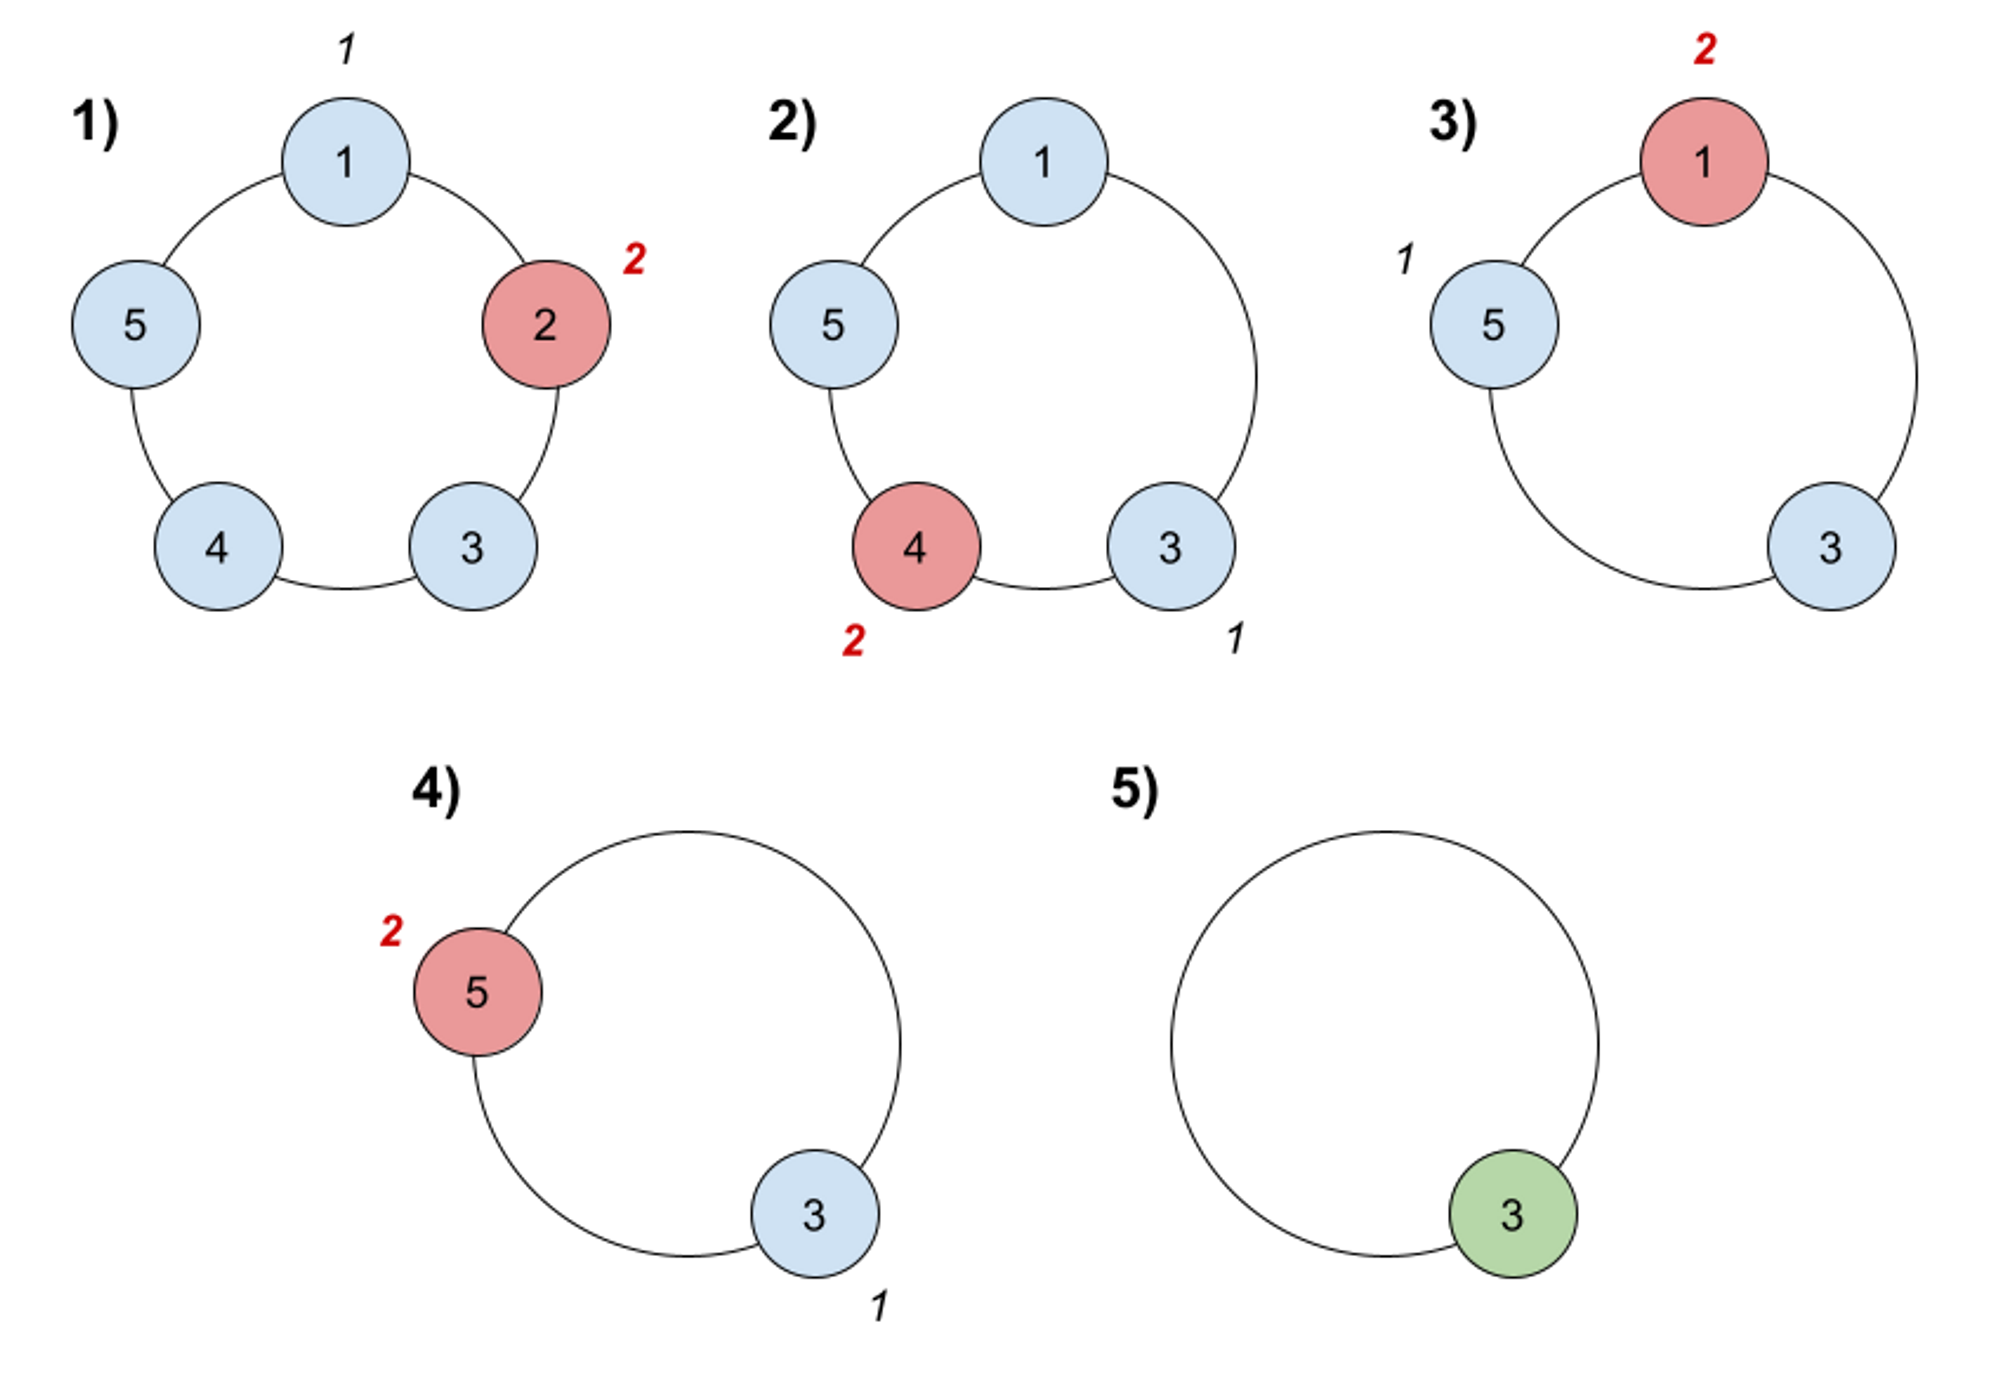

```
Input: n = 5, k = 2
Output: 3
Explanation: Here are the steps of the game:
1) Start at friend 1.
2) Count 2 friends clockwise, which are friends 1 and 2.
3) Friend 2 leaves the circle. Next start is friend 3.
4) Count 2 friends clockwise, which are friends 3 and 4.
5) Friend 4 leaves the circle. Next start is friend 5.
6) Count 2 friends clockwise, which are friends 5 and 1.
7) Friend 1 leaves the circle. Next start is friend 3.
8) Count 2 friends clockwise, which are friends 3 and 5.
9) Friend 5 leaves the circle. Only friend 3 is left, so they are the winner.
```

**Example 2:**

```
Input: n = 6, k = 5
Output: 1
Explanation: The friends leave in this order: 5, 4, 6, 2, 3. The winner is friend 1.

```

# Ans.

**Solution Approach 1**

**Brute Force Approach:**

One way to solve this problem is by simulating the game and keeping track of the friends using a list. We repeat the steps of the game until only one friend is left.

In [40]:
def findTheWinner_brute_force(n, k):
    friends = list(range(1, n + 1))
    current = 0

    while len(friends) > 1:
        current = (current + k - 1) % len(friends)
        friends.pop(current)

    return friends[0]


**Test Case:**

In [41]:
# Test cases
print(findTheWinner_brute_force(5, 2))  

3


In [42]:
print(findTheWinner_brute_force(6, 5))

1


**Discussion :**</br>

**The time complexity** of the brute force approach is O(n^2) because we remove one friend from the list in each iteration, and the removal operation takes O(n) time. We repeat this process until only one friend is left.

**The space complexity** of the brute force approach is O(n) because we create a list of size n to keep track of the friends.

**Solution Approach 2**

**Optimized Approach:**

An optimized approach can be based on the observation that when a friend is eliminated, the next starting friend will be at an index shifted by k positions. Using this observation, we can calculate the index of the winner friend directly without simulating the entire game.

In [43]:
def findTheWinner(n, k):
    winner = 0

    for i in range(1, n + 1):
        winner = (winner + k) % i

    return winner + 1


**Test Case:**

In [44]:
# Test cases
print(findTheWinner(5, 2))

3


In [45]:
print(findTheWinner(6, 5)) 

1


**Discussion :**</br>

**The time complexity** of the optimized approach is O(n) because we iterate n times to find the winner friend.

**The space complexity** of the optimized approach is O(1) because we only use a constant amount of space to store the winner friend index.

# Q6


💡 **Question 6**

You are given an integer array `deck`. There is a deck of cards where every card has a unique integer. The integer on the `ith` card is `deck[i]`.

You can order the deck in any order you want. Initially, all the cards start face down (unrevealed) in one deck.

You will do the following steps repeatedly until all cards are revealed:

1. Take the top card of the deck, reveal it, and take it out of the deck.
2. If there are still cards in the deck then put the next top card of the deck at the bottom of the deck.
3. If there are still unrevealed cards, go back to step 1. Otherwise, stop.

Return *an ordering of the deck that would reveal the cards in increasing order*.

**Note** that the first entry in the answer is considered to be the top of the deck.

**Example 1:**

```
Input: deck = [17,13,11,2,3,5,7]
Output: [2,13,3,11,5,17,7]
Explanation:
We get the deck in the order [17,13,11,2,3,5,7] (this order does not matter), and reorder it.
After reordering, the deck starts as [2,13,3,11,5,17,7], where 2 is the top of the deck.
We reveal 2, and move 13 to the bottom.  The deck is now [3,11,5,17,7,13].
We reveal 3, and move 11 to the bottom.  The deck is now [5,17,7,13,11].
We reveal 5, and move 17 to the bottom.  The deck is now [7,13,11,17].
We reveal 7, and move 13 to the bottom.  The deck is now [11,17,13].
We reveal 11, and move 17 to the bottom.  The deck is now [13,17].
We reveal 13, and move 17 to the bottom.  The deck is now [17].
We reveal 17.
Since all the cards revealed are in increasing order, the answer is correct.

```

**Example 2:**

```
Input: deck = [1,1000]
Output: [1,1000]

```

# Ans.

**Solution Approach 1**

**Brute Force Approach:**

One way to solve this problem is by simulating the process described in the question. We can start by sorting the deck in ascending order. Then, we can create an empty result list and iterate through the sorted deck. In each iteration, we append the last element from the result list to the front and then append the current card from the sorted deck. Finally, we return the result list.

In [46]:
def deckRevealedIncreasing_brute_force(deck):
    deck.sort()
    result = []

    while deck:
        if result:
            result.insert(0, result.pop())
        result.insert(0, deck.pop())

    return result


**Test Case:**

In [47]:
# Test cases
print(deckRevealedIncreasing_brute_force([17, 13, 11, 2, 3, 5, 7]))

[2, 13, 3, 11, 5, 17, 7]


In [48]:
print(deckRevealedIncreasing_brute_force([1, 1000]))

[1, 1000]


**Discussion :**</br>

**The time complexity** of the brute force approach is O(n^2) because for each card in the deck, we perform list insertions and deletions, which take O(n) time.

**The space complexity** of the brute force approach is O(n) because we create a result list of the same size as the deck.

**Solution Approach 2**

**Optimized Approach:**

An optimized approach can be based on the observation that we can reverse-engineer the process to find the original order of the deck. We start by sorting the deck in ascending order. Then, we create a queue with the indices from 0 to n-1. We also create an empty result list of the same size as the deck. We iterate through the sorted deck, and in each iteration, we pop the first index from the queue and assign the current card to the result list at that index. Then, we append the next index to the end of the queue. Finally, we return the result list.

In [49]:
from collections import deque

def deckRevealedIncreasing(deck):
    deck.sort()
    n = len(deck)
    queue = deque(range(n))
    result = [0] * n

    for card in deck:
        result[queue.popleft()] = card
        if queue:
            queue.append(queue.popleft())

    return result


**Test Case:**

In [50]:
# Test cases
print(deckRevealedIncreasing([17, 13, 11, 2, 3, 5, 7]))

[2, 13, 3, 11, 5, 17, 7]


In [51]:
print(deckRevealedIncreasing([1, 1000]))

[1, 1000]


**Discussion :**</br>

**The time complexity** of the optimized approach is O(n log n) due to the sorting operation.

**The space complexity** of the optimized approach is O(n) because we create a queue and a result list of the same size as the deck.

# Q7


💡 **Question 7**

Design a queue that supports `push` and `pop` operations in the front, middle, and back.

Implement the `FrontMiddleBack` class:

- `FrontMiddleBack()` Initializes the queue.
- `void pushFront(int val)` Adds `val` to the **front** of the queue.
- `void pushMiddle(int val)` Adds `val` to the **middle** of the queue.
- `void pushBack(int val)` Adds `val` to the **back** of the queue.
- `int popFront()` Removes the **front** element of the queue and returns it. If the queue is empty, return `1`.
- `int popMiddle()` Removes the **middle** element of the queue and returns it. If the queue is empty, return `1`.
- `int popBack()` Removes the **back** element of the queue and returns it. If the queue is empty, return `1`.

**Notice** that when there are **two** middle position choices, the operation is performed on the **frontmost** middle position choice. For example:

- Pushing `6` into the middle of `[1, 2, 3, 4, 5]` results in `[1, 2, 6, 3, 4, 5]`.
- Popping the middle from `[1, 2, 3, 4, 5, 6]` returns `3` and results in `[1, 2, 4, 5, 6]`.

**Example 1:**

```
Input:
["FrontMiddleBackQueue", "pushFront", "pushBack", "pushMiddle", "pushMiddle", "popFront", "popMiddle", "popMiddle", "popBack", "popFront"]
[[], [1], [2], [3], [4], [], [], [], [], []]
Output:
[null, null, null, null, null, 1, 3, 4, 2, -1]

Explanation:
FrontMiddleBackQueue q = new FrontMiddleBackQueue();
q.pushFront(1);   // [1]
q.pushBack(2);    // [1,2]
q.pushMiddle(3);  // [1,3, 2]
q.pushMiddle(4);  // [1,4, 3, 2]
q.popFront();     // return 1 -> [4, 3, 2]
q.popMiddle();    // return 3 -> [4, 2]
q.popMiddle();    // return 4 -> [2]
q.popBack();      // return 2 -> []
q.popFront();     // return -1 -> [] (The queue is empty)

```

# Ans.

**Solution Approach:**

To design a queue that supports push and pop operations in the front, middle, and back, we can implement a double-ended queue (deque) with additional logic to handle the middle insertion and removal. The deque data structure provides efficient push and pop operations from both ends.

Here's an approach to solving this problem:

1. Initialize an empty deque in the FrontMiddleBackQueue class.
2. Implement the pushFront method to push an element to the front of the deque using the appendleft function of the deque.
3. Implement the pushMiddle method to insert an element in the middle of the deque. To do this, split the deque into two halves and append the new element to the first half. Then, extend the first half with the second half.
4. Implement the pushBack method to push an element to the back of the deque using the append function of the deque.
5. Implement the popFront method to remove and return the front element of the deque. If the deque is empty, return 1.
6. Implement the popMiddle method to remove and return the middle element of the deque. If the deque is empty, return 1. To do this, split the deque into two halves and remove the last element from the first half.
7. Implement the popBack method to remove and return the back element of the deque. If the deque is empty, return 1.

In [52]:
from collections import deque

class FrontMiddleBackQueue:
    def __init__(self):
        self.deque = deque()

    def pushFront(self, val):
        self.deque.appendleft(val)

    def pushMiddle(self, val):
        size = len(self.deque)
        mid = size // 2
        self.deque.rotate(-mid)
        self.deque.appendleft(val)
        self.deque.rotate(mid)

    def pushBack(self, val):
        self.deque.append(val)

    def popFront(self):
        if self.deque:
            return self.deque.popleft()
        return -1

    def popMiddle(self):
        size = len(self.deque)
        if size == 0:
            return -1
        mid = (size - 1) // 2
        self.deque.rotate(-mid)
        res = self.deque.popleft()
        self.deque.rotate(mid)
        return res

    def popBack(self):
        if self.deque:
            return self.deque.pop()
        return -1


**Test Case:**

In [53]:
q = FrontMiddleBackQueue()
q.pushFront(1)
q.pushBack(2)
q.pushMiddle(3)
q.pushMiddle(4)
print(q.popFront())
print(q.popMiddle())
print(q.popMiddle())
print(q.popBack())
print(q.popFront())

1
3
4
2
-1


**Discussion :**</br>

**The time complexity** of the above approach is as follows:

- pushFront: O(1)
- pushMiddle: O(n)
- pushBack: O(1)
- popFront: O(1)
- popMiddle: O(n)
- popBack: O(1)


**The space complexity** is O(n) to store the elements in the deque.

# Q8


💡 **Question 8**

For a stream of integers, implement a data structure that checks if the last `k` integers parsed in the stream are **equal** to `value`.

Implement the **DataStream** class:

- `DataStream(int value, int k)` Initializes the object with an empty integer stream and the two integers `value` and `k`.
- `boolean consec(int num)` Adds `num` to the stream of integers. Returns `true` if the last `k` integers are equal to `value`, and `false` otherwise. If there are less than `k` integers, the condition does not hold true, so returns `false`.

**Example 1:**

```
Input
["DataStream", "consec", "consec", "consec", "consec"]
[[4, 3], [4], [4], [4], [3]]
Output
[null, false, false, true, false]

Explanation
DataStream dataStream = new DataStream(4, 3); //value = 4, k = 3
dataStream.consec(4); // Only 1 integer is parsed, so returns False.
dataStream.consec(4); // Only 2 integers are parsed.
                      // Since 2 is less than k, returns False.
dataStream.consec(4); // The 3 integers parsed are all equal to value, so returns True.
dataStream.consec(3); // The last k integers parsed in the stream are [4,4,3].
                      // Since 3 is not equal to value, it returns False.

```

# Ans.

**Solution Approach:**

To implement the DataStream class that checks if the last k integers parsed in the stream are equal to value, we can maintain a queue of size k to store the recent integers parsed in the stream. Whenever a new integer is added to the stream, we compare it with value and check if the last k integers in the queue are equal to value.

Here's an approach to solving this problem:

1. Initialize an empty queue and store value and k as instance variables in the DataStream class.
2. Implement the consec method to check if the last k integers in the stream are equal to value.
    - If the size of the queue is less than k, return False since there are not enough integers in the stream to satisfy the condition.
    - If the size of the queue is equal to k, compare each integer in the queue with value. If any integer is not equal to value, return False. Otherwise, return True.
3. When a new integer is parsed in the stream, add it to the queue.
    - If the size of the queue exceeds k, remove the oldest integer from the queue.

In [54]:
from collections import deque

class DataStream:
    def __init__(self, value, k):
        self.queue = deque()
        self.value = value
        self.k = k

    def consec(self, num):
        self.queue.append(num)
        if len(self.queue) < self.k:
            return False
        if len(self.queue) > self.k:
            self.queue.popleft()
        return all(num == self.value for num in self.queue)


**Test Case:**

In [55]:
dataStream = DataStream(4, 3)
print(dataStream.consec(4))
print(dataStream.consec(4))
print(dataStream.consec(4))
print(dataStream.consec(3))

False
False
True
False


**Discussion :**</br>

**The time complexity** of the `consec` method is O(k) because we iterate over the elements in the queue, which has a maximum size of k. 

**The space complexity** is O(k) to store the elements in the queue.